In [1]:
HEAD_PATH = "d:/intern"

In [51]:
import warnings
 
warnings.filterwarnings('ignore')

- path of data

- Welcome to Quantitative and High Frequency Trading Training Program
- Let's start with basic data analysis with python
- you can use Shift+Enter to run each line of code

- path of our program

In [3]:
DATA_PATH = HEAD_PATH + "/pkl tick/"

- set working directory

In [4]:
import os
os.chdir(DATA_PATH)

- number of cores

In [5]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16


- get working directory

In [6]:
os.getcwd()

'd:\\intern\\pkl tick'

- sample product, you can change to your specific product symbol
- for this quarter we analyze all of the black medals

In [7]:
product_list = ["bu", "ru", "v", "pp", "l", "jd"]
product = product_list[0]

- directory of the product's data

In [8]:
dire = DATA_PATH + product
dire

'd:/intern/pkl tick/bu'

- get all available data

In [9]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
len(all_dates)
## 1066

1066

- we can see that there are 974 days
- all of the products have the same trading days
- so we just take a as an example
- get first several dates

In [10]:
all_dates[:6]

# ['20171009.pkl',
#  '20171010.pkl',
#  '20171011.pkl',
#  '20171012.pkl',
#  '20171013.pkl',
#  '20171016.pkl']

['20171009.pkl',
 '20171010.pkl',
 '20171011.pkl',
 '20171012.pkl',
 '20171013.pkl',
 '20171016.pkl']

- get last several dates

In [11]:
all_dates[-6:]

# ['20220217.pkl',
#  '20220218.pkl',
#  '20220221.pkl',
#  '20220222.pkl',
#  '20220223.pkl',
#  '20220224.pkl']

['20220217.pkl',
 '20220218.pkl',
 '20220221.pkl',
 '20220222.pkl',
 '20220223.pkl',
 '20220224.pkl']

- specify a date

In [19]:
date = "20190611"

- loading data set

In [20]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

- get the column names of data

In [21]:
data.columns
## contract: contract name, product+expiration date
## date.time: date and time
## price: newest price of data
## cum.open.int: cumulative open interest
## open.int: newest open interest increment
## turnover: newest turnover increment
## qty: newest trading volume
## bid: bid price
## ask: ask price
## bid.qty: bid size
## ask.qty: ask size
## date: actual date
## time: acutal time
## milli: actual milli second
## mid.price: middle price of bid and ask
## buy.trade: active buy volume at level 1
## buy2.trade: active buy volume at other levels
## sell.trade: active sell volume at level 1
## sell2.trade: active sell volume at other levels
## log.price: log wpr (to be defined soon)
## ret: log return of last tick
## wpr: volume weighted price
## wpr.ret: price change of wpr
## high: highest price of last ask, last price, and this ask
## low: lowest price of last bid, last price, and thsi bid
## next.bid: estimated active sell price, used for backtesting
## next.ask: estimated active buy price, used for backtesting
## min.1024: rolling minimum of wpr over 1024 ticks
## max.1024: rolling maximum of wpr over 1024 ticks
## min.2048: rolling minimum of wpr over 2048 ticks
## max.2048: rolling maximum of wpr over 2048 ticks
## min.4096: rolling minimum of wpr over 4096 ticks
## max.4096: rolling maximum of wpr over 4096 ticks

## Q：关于这个数据的每个 column 的含义，能否介绍一下？一些缩写我不太了解什么含义？
## A：各名称含义如下：
## contract: 合约的名字，如 rb1605，表示螺纹钢合约，2016 年 5 月到期；
## date.time: 日期和时间合在一起，方便作图用；
## price: 最新的成交价；
## cum.open.int: 总的持仓量；
## open.int: 最新的持仓量改变量
## turnover: 最新的成交额；
## qty: 最新的成交量；
## bid: 买一价；
## ask: 卖一价；
## bid.qty: 买一量；
## ask.qty: 卖一量；
## date: 实际日期；
## time: 实际时间；
## milli: 毫秒数（上期所与中金所是 0、500，大商所随机，郑商所是 0）；
## mid.price: 买一和卖一的中间价；
## buy.trade: 一档主动买量（估算，非交易所提供）；
## buy2.trade: 其他价位主动买量（估算，非交易所提供）；
## sell.trade: 一档主动卖量（估算，非交易所提供）；
## sell2.trade: 其他价位主动买量（估算，非交易所提供）；
## log.price: wpr 的对数（wpr 下面定义）；
## ret: 最新一笔行情的对数收益率；
## wpr: 挂单量加权平均价；
## wpr.ret: wpr 的价格变化；
## min.1024: 过去 1024 笔行情的 wpr 最小值
## max.1024: 过去 1024 笔行情的 wpr 最大值；
## high: 当前 ask、前一个 ask、最新价的最高价（构造最小级别 K 线用）；
## low: 当前 bid、前一个 bid、最新价的最低价（狗仔最小级别 K 线用）；
## next.bid: 主动卖单的成交价（估算，非交易所提供），用于回测；
## next.ask: 主动买单的成交价（估算，非交易所提供），用于回测；
## min.1024: 1024跳滚动最低价
## max.1024: 1024跳滚动最高价
## min.2048: 2048跳滚动最低价
## max.2048: 2048跳滚动最高价
## min.4096: 4096滚动最低价
## max.4096: 4096滚动最高价

Index(['contract', 'date.time', 'price', 'cum.open.int', 'open.int',
       'turnover', 'qty', 'bid', 'ask', 'bid.qty', 'ask.qty', 'date', 'time',
       'milli', 'good', 'mid.price', 'buy.trade', 'buy2.trade', 'sell.trade',
       'sell2.trade', 'log.price', 'ret', 'wpr', 'wpr.ret', 'next.ask',
       'next.bid', 'min.1024', 'max.1024', 'min.2048', 'max.2048', 'min.4096',
       'max.4096'],
      dtype='object')

In [22]:
data.iloc[0:10,0:10]

#  	contract 	date.time 	price 	cum.open.int 	open.int 	turnover 	qty 	bid 	ask 	bid.qty
# 0 	bu1912 	2019-06-10 20:59:00.500 	2980.0 	535484 	580 	66692400.0 	2238 	2978.0 	2980.0 	13
# 1 	bu1912 	2019-06-10 21:00:00.500 	2976.0 	535532 	48 	2680960.0 	90 	2976.0 	2978.0 	21
# 2 	bu1912 	2019-06-10 21:00:01.000 	2980.0 	535728 	196 	12334360.0 	414 	2978.0 	2980.0 	29
# 3 	bu1912 	2019-06-10 21:00:01.500 	2980.0 	535804 	76 	10960440.0 	368 	2978.0 	2980.0 	8
# 4 	bu1912 	2019-06-10 21:00:02.000 	2978.0 	535864 	60 	2978000.0 	100 	2976.0 	2978.0 	24
# 5 	bu1912 	2019-06-10 21:00:02.500 	2976.0 	535880 	16 	1368960.0 	46 	2976.0 	2978.0 	1
# 6 	bu1912 	2019-06-10 21:00:03.000 	2978.0 	536026 	146 	6964400.0 	234 	2976.0 	2978.0 	88
# 7 	bu1912 	2019-06-10 21:00:03.500 	2978.0 	536038 	12 	1488880.0 	50 	2976.0 	2978.0 	88
# 8 	bu1912 	2019-06-10 21:00:04.000 	2978.0 	536060 	22 	2739760.0 	92 	2976.0 	2978.0 	88
# 9 	bu1912 	2019-06-10 21:00:04.500 	2976.0 	536014 	-46 	1785720.0 	60 	2976.0 	2978.0 	68

,contract,date.time,price,cum.open.int,open.int,turnover,qty,bid,ask,bid.qty
0,bu1912,2019-06-10 20:59:00.500,2980.0,535484,580,66692400.0,2238,2978.0,2980.0,13
1,bu1912,2019-06-10 21:00:00.500,2976.0,535532,48,2680960.0,90,2976.0,2978.0,21
2,bu1912,2019-06-10 21:00:01.000,2980.0,535728,196,12334360.0,414,2978.0,2980.0,29
3,bu1912,2019-06-10 21:00:01.500,2980.0,535804,76,10960440.0,368,2978.0,2980.0,8
4,bu1912,2019-06-10 21:00:02.000,2978.0,535864,60,2978000.0,100,2976.0,2978.0,24
5,bu1912,2019-06-10 21:00:02.500,2976.0,535880,16,1368960.0,46,2976.0,2978.0,1
6,bu1912,2019-06-10 21:00:03.000,2978.0,536026,146,6964400.0,234,2976.0,2978.0,88
7,bu1912,2019-06-10 21:00:03.500,2978.0,536038,12,1488880.0,50,2976.0,2978.0,88
8,bu1912,2019-06-10 21:00:04.000,2978.0,536060,22,2739760.0,92,2976.0,2978.0,88
9,bu1912,2019-06-10 21:00:04.500,2976.0,536014,-46,1785720.0,60,2976.0,2978.0,68


In [23]:
data.iloc[0:10,10:20]

#  	ask.qty 	date 	time 	milli 	good 	mid.price 	buy.trade 	buy2.trade 	sell.trade 	sell2.trade
# 0 	6 	20190610 	20:59:00 	500 	False 	2979.0 	1119.0 	0.0 	1119.0 	0.0
# 1 	16 	20190610 	21:00:00 	500 	False 	2977.0 	38.0 	0.0 	52.0 	0.0
# 2 	39 	20190610 	21:00:01 	0 	False 	2979.0 	142.0 	272.0 	0.0 	0.0
# 3 	10 	20190610 	21:00:01 	500 	False 	2979.0 	70.0 	0.0 	298.0 	0.0
# 4 	113 	20190610 	21:00:02 	0 	False 	2977.0 	0.0 	0.0 	100.0 	0.0
# 5 	145 	20190610 	21:00:02 	500 	False 	2977.0 	0.0 	0.0 	46.0 	0.0
# 6 	79 	20190610 	21:00:03 	0 	False 	2977.0 	28.0 	0.0 	206.0 	0.0
# 7 	76 	20190610 	21:00:03 	500 	False 	2977.0 	44.0 	0.0 	6.0 	0.0
# 8 	35 	20190610 	21:00:04 	0 	False 	2977.0 	92.0 	0.0 	0.0 	0.0
# 9 	34 	20190610 	21:00:04 	500 	False 	2977.0 	6.0 	0.0 	54.0 	0.0

,ask.qty,date,time,milli,good,mid.price,buy.trade,buy2.trade,sell.trade,sell2.trade
0,6,20190610,20:59:00,500,False,2979.0,1119.0,0.0,1119.0,0.0
1,16,20190610,21:00:00,500,False,2977.0,38.0,0.0,52.0,0.0
2,39,20190610,21:00:01,0,False,2979.0,142.0,272.0,0.0,0.0
3,10,20190610,21:00:01,500,False,2979.0,70.0,0.0,298.0,0.0
4,113,20190610,21:00:02,0,False,2977.0,0.0,0.0,100.0,0.0
5,145,20190610,21:00:02,500,False,2977.0,0.0,0.0,46.0,0.0
6,79,20190610,21:00:03,0,False,2977.0,28.0,0.0,206.0,0.0
7,76,20190610,21:00:03,500,False,2977.0,44.0,0.0,6.0,0.0
8,35,20190610,21:00:04,0,False,2977.0,92.0,0.0,0.0,0.0
9,34,20190610,21:00:04,500,False,2977.0,6.0,0.0,54.0,0.0


In [24]:
data.iloc[0:10,20:]

#  	log.price 	ret 	wpr 	wpr.ret 	next.ask 	next.bid 	min.1024 	max.1024 	min.2048 	max.2048 	min.4096 	max.4096
# 0 	7.999467 	0.001803 	2979.368421 	5.368421 	2978.0 	2976.0 	2979.368421 	2979.368421 	2979.368421 	2979.368421 	2979.368421 	2979.368421
# 1 	7.998717 	-0.000750 	2977.135135 	-2.233286 	2980.0 	2978.0 	2977.135135 	2979.368421 	2977.135135 	2979.368421 	2977.135135 	2979.368421
# 2 	7.999294 	0.000577 	2978.852941 	1.717806 	2980.0 	2978.0 	2977.135135 	2979.368421 	2977.135135 	2979.368421 	2977.135135 	2979.368421
# 3 	7.999306 	0.000012 	2978.888889 	0.035948 	2978.0 	2976.0 	2977.135135 	2979.368421 	2977.135135 	2979.368421 	2977.135135 	2979.368421
# 4 	7.998453 	-0.000853 	2976.350365 	-2.538524 	2978.0 	2976.0 	2976.350365 	2979.368421 	2976.350365 	2979.368421 	2976.350365 	2979.368421
# 5 	7.998340 	-0.000113 	2976.013699 	-0.336666 	2978.0 	2976.0 	2976.013699 	2979.368421 	2976.013699 	2979.368421 	2976.013699 	2979.368421
# 6 	7.998689 	0.000349 	2977.053892 	1.040194 	2978.0 	2976.0 	2976.013699 	2979.368421 	2976.013699 	2979.368421 	2976.013699 	2979.368421
# 7 	7.998696 	0.000006 	2977.073171 	0.019279 	2978.0 	2976.0 	2976.013699 	2979.368421 	2976.013699 	2979.368421 	2976.013699 	2979.368421
# 8 	7.998816 	0.000120 	2977.430894 	0.357724 	2978.0 	2976.0 	2976.013699 	2979.368421 	2976.013699 	2979.368421 	2976.013699 	2979.368421
# 9 	7.998783 	-0.000033 	2977.333333 	-0.097561 	2978.0 	2976.0 	2976.013699 	2979.368421 	2976.013699 	2979.368421 	2976.013699 	2979.368421

,log.price,ret,wpr,wpr.ret,next.ask,next.bid,min.1024,max.1024,min.2048,max.2048,min.4096,max.4096
0,7.999467,0.001803,2979.368421,5.368421,2978.0,2976.0,2979.368421,2979.368421,2979.368421,2979.368421,2979.368421,2979.368421
1,7.998717,-0.000750,2977.135135,-2.233286,2980.0,2978.0,2977.135135,2979.368421,2977.135135,2979.368421,2977.135135,2979.368421
2,7.999294,0.000577,2978.852941,1.717806,2980.0,2978.0,2977.135135,2979.368421,2977.135135,2979.368421,2977.135135,2979.368421
3,7.999306,0.000012,2978.888889,0.035948,2978.0,2976.0,2977.135135,2979.368421,2977.135135,2979.368421,2977.135135,2979.368421
4,7.998453,-0.000853,2976.350365,-2.538524,2978.0,2976.0,2976.350365,2979.368421,2976.350365,2979.368421,2976.350365,2979.368421
5,7.998340,-0.000113,2976.013699,-0.336666,2978.0,2976.0,2976.013699,2979.368421,2976.013699,2979.368421,2976.013699,2979.368421
6,7.998689,0.000349,2977.053892,1.040194,2978.0,2976.0,2976.013699,2979.368421,2976.013699,2979.368421,2976.013699,2979.368421
7,7.998696,0.000006,2977.073171,0.019279,2978.0,2976.0,2976.013699,2979.368421,2976.013699,2979.368421,2976.013699,2979.368421
8,7.998816,0.000120,2977.430894,0.357724,2978.0,2976.0,2976.013699,2979.368421,2976.013699,2979.368421,2976.013699,2979.368421
9,7.998783,-0.000033,2977.333333,-0.097561,2978.0,2976.0,2976.013699,2979.368421,2976.013699,2979.368421,2976.013699,2979.368421


- plot the price

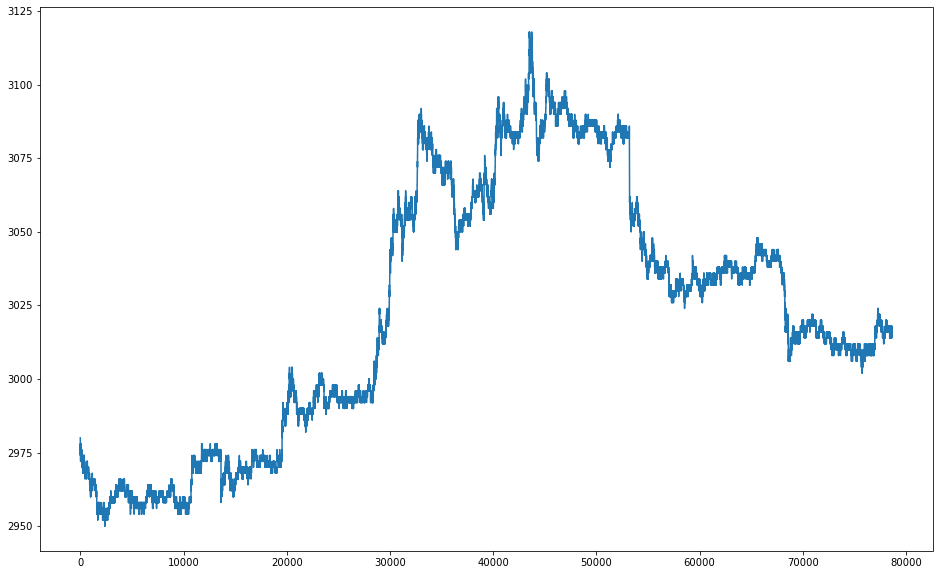

In [25]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["price"].values);

In [26]:
data["time"]

0        20:59:00
1        21:00:00
2        21:00:01
3        21:00:01
4        21:00:02
           ...   
78628    14:59:58
78629    14:59:59
78630    14:59:59
78631    15:00:00
78632    15:00:00
Name: time, Length: 78633, dtype: object

In [27]:
data["time"]<"03:00:00"

0        False
1        False
2        False
3        False
4        False
         ...  
78628    False
78629    False
78630    False
78631    False
78632    False
Name: time, Length: 78633, dtype: bool

In [28]:
 ((data["time"] >="09:00:00")& (data["time"]<"15:15:02"))

0        False
1        False
2        False
3        False
4        False
         ...  
78628     True
78629     True
78630     True
78631     True
78632     True
Name: time, Length: 78633, dtype: bool

- specific a range of price

In [29]:
np.where(data["good"])

(array([13638, 13639, 13640, ..., 53199, 53200, 53201], dtype=int64),)

In [30]:
data["time"][data["good"]]

13638    09:00:00
13639    09:00:01
13640    09:00:01
13641    09:00:02
13642    09:00:02
           ...   
53197    22:59:58
53198    22:59:59
53199    22:59:59
53200    23:00:00
53201    23:00:00
Name: time, Length: 39564, dtype: object

In [31]:
range_ = data["good"]

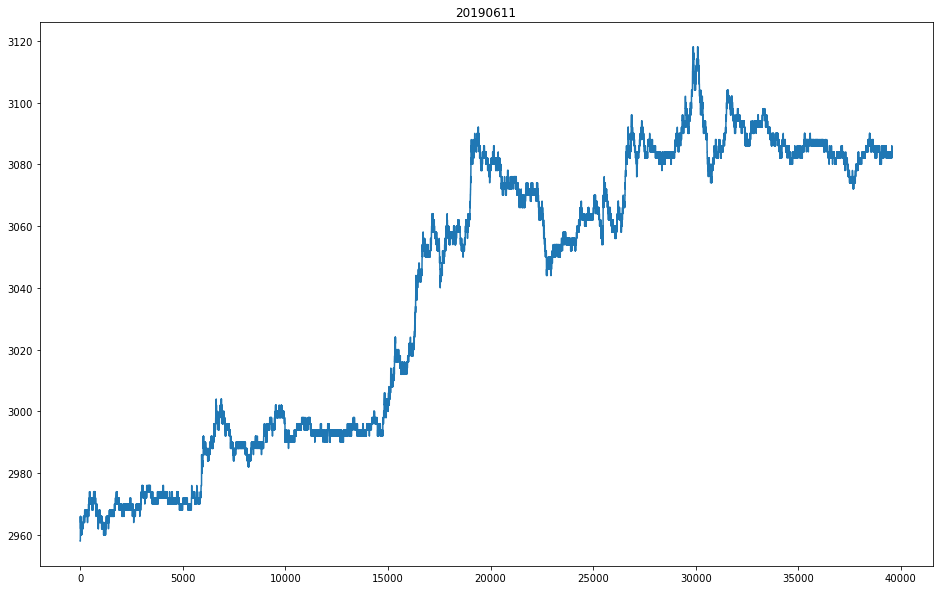

In [32]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["price"][range_].values);

- add time

- plot price change

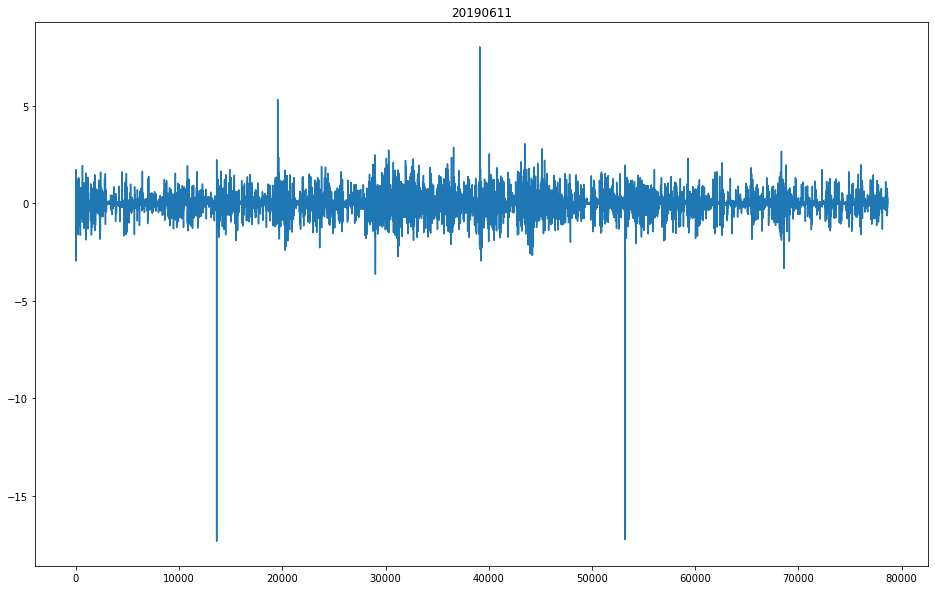

In [33]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);

- plot price log return

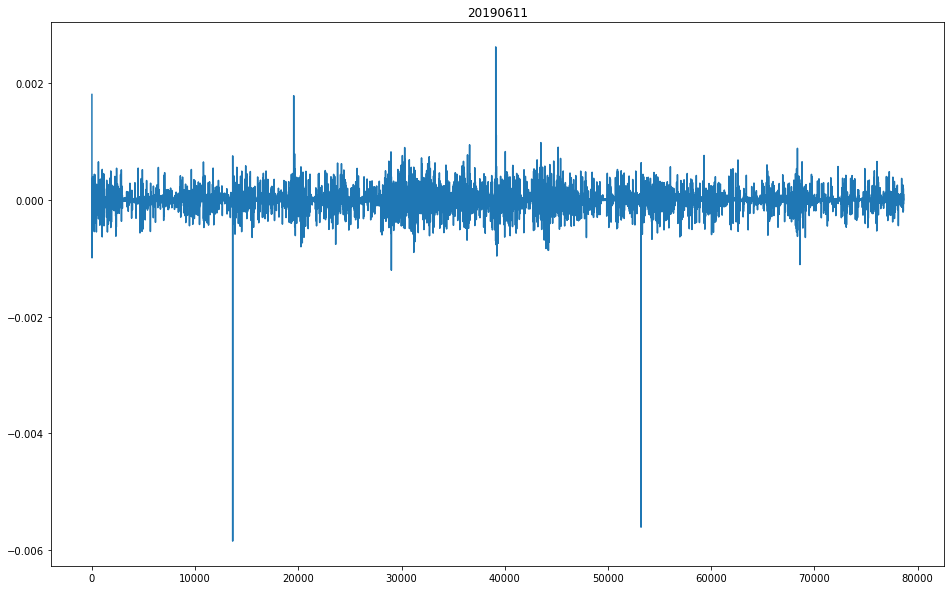

In [34]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["ret"].values);

- count the number of rising ticks

In [35]:
sum(data['ret']>0)/len(data)
## 0.45665305914819476

0.45665305914819476

- count the number of falling ticks

In [36]:
sum(data['ret']<0)/len(data)
## 0.44556356745895487

0.44556356745895487

In [37]:
sum(data['ret']==0)/len(data)
## 0.09778337339285033

0.09778337339285033

- count the number of total ticks

In [38]:
len(data)
## 78633

78633

- formula to calculate wpr:

In [39]:
wpr = (data["bid"]*data["ask.qty"]+data["ask"]*data["bid.qty"])/(data["bid.qty"]+data["ask.qty"])

- upper limit or lower limit

In [40]:
limit = (data["ask.qty"]==0) | (data["bid.qty"]==0)

- in this case, one of bid and ask price is zero, so using newest price as wpr

In [41]:
wpr[limit] = data["price"][limit]

In [42]:
wpr.head()

# 0    2979.368421
# 1    2977.135135
# 2    2978.852941
# 3    2978.888889
# 4    2976.350365
# dtype: float64

0    2979.368421
1    2977.135135
2    2978.852941
3    2978.888889
4    2976.350365
dtype: float64

In [43]:
data["wpr"].head()

# 0    2979.368421
# 1    2977.135135
# 2    2978.852941
# 3    2978.888889
# 4    2976.350365
# Name: wpr, dtype: float64


0    2979.368421
1    2977.135135
2    2978.852941
3    2978.888889
4    2976.350365
Name: wpr, dtype: float64

In [44]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

- stationary test for return series

- load related package

In [47]:
import statsmodels.tsa.stattools as ts

In [48]:
result = ts.adfuller(data["ret"][data["good"]], maxlag=int(pow(len(data["ret"][data["good"]])-1,(1/3))), regression='ct', autolag=None)
result

# (-31.211264966728354,
#  0.0,
#  34,
#  39529,
#  {'1%': -3.958999042456274,
#   '5%': -3.4106010736072427,
#   '10%': -3.127115412717461})

## for this test the smaller the value the more stationary it is
## so it's stationary

(-31.211264966728354,
 0.0,
 34,
 39529,
 {'1%': -3.958999042456274,
  '5%': -3.4106010736072427,
  '10%': -3.127115412717461})

In [52]:
result = ts.kpss(data["ret"][data["good"]], regression='c', nlags=int(3*math.sqrt(len(data["ret"][data["good"]]))/13))
result

# (0.12453800798512939,
#  0.1,
#  45,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

    ## for KPSS test, small value means level stationary, large value means trend
    ## its p-value is 0.1 so it's stationary

(0.12453800798512939,
 0.1,
 45,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [57]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [58]:
sum(data["ret"][0:120])
## 0.0005975946991920696

0.0005975946991920696

In [59]:
ret_120.iloc[0]
## 0.00569024841933974

0.0005975946991920699

- plot the price movements of 120 ticks

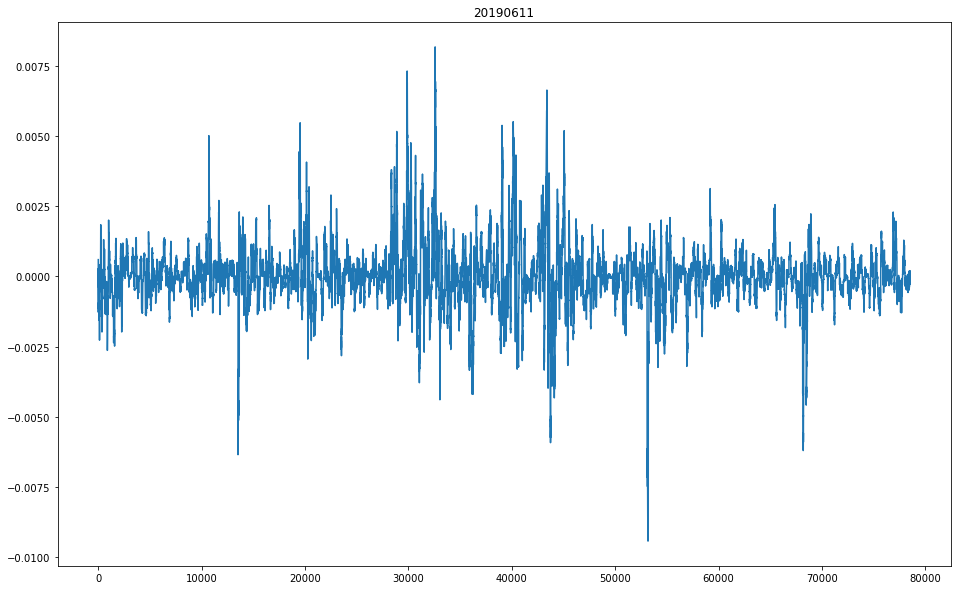

In [60]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

In [61]:
len(ret_120)
## 78514

78514

In [62]:
len(data)
## 78633

78633

In [63]:
range_120 = ((np.mod(np.arange(0, len(data)),120)==0) & data["good"])[119:]

In [64]:
len(ret_120)
## 78514

78514

In [65]:
ret_120.iloc[np.where(range_120)]

# 13561   -0.004965
# 13681    0.001631
# 13801    0.000689
# 13921    0.000002
# 14041    0.001351
#            ...   
# 52561   -0.001061
# 52681    0.000841
# 52801   -0.000050
# 52921   -0.000322
# 53041    0.000109
# Name: ret, Length: 330, dtype: float64

#     test whether ret.120 is stationary



13561   -0.004965
13681    0.001631
13801    0.000689
13921    0.000002
14041    0.001351
           ...   
52561   -0.001061
52681    0.000841
52801   -0.000050
52921   -0.000322
53041    0.000109
Name: ret, Length: 330, dtype: float64

- test whether ret.120 is stationary

In [66]:
result = ts.adfuller(ret_120.iloc[np.where(range_120)], maxlag=int(pow(len(ret_120.iloc[np.where(range_120)])-1,(1/3))), regression='ct', autolag=None)
result

# (-8.169627378370786,
#  2.8969860698843726e-11,
#  6,
#  323,
#  {'1%': -3.9870746386005544,
#   '5%': -3.4241705267641804,
#   '10%': -3.135093239060335})

(-8.169627378370786,
 2.8969860698843726e-11,
 6,
 323,
 {'1%': -3.9870746386005544,
  '5%': -3.4241705267641804,
  '10%': -3.135093239060335})

In [68]:
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c', nlags=int(3*math.sqrt(len(ret_120.iloc[np.where(range_120)]))/13))
result

# (0.10660855925076942,
#  0.1,
#  4,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's still stationary

(0.10660855925076942,
 0.1,
 4,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [69]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

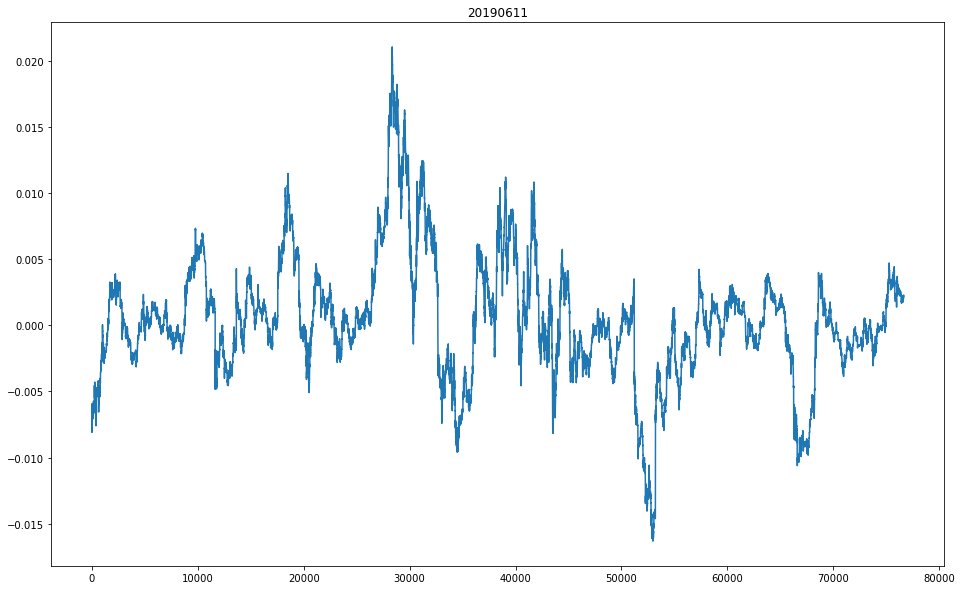

In [70]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [63]:
sum((np.mod(np.arange(1, len(data)+1),2000)==0) & (data["good"]))
## 17

17

- So there are too few points to test for stationary

In [71]:
import pandas as pd
import _pickle as cPickle
import gzip

In [72]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

- there may be too few data
- we can check for more days

In [73]:
def get_sample_ret(date, period):
    data = load(DATA_PATH + product+"/"+date)
    ret = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    range = ((np.mod(np.arange(0, len(data)),period)==0) & data["good"])[(period-1):]
    return ret.iloc[np.where(range)]


In [74]:
import functools
import dask
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [75]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)
;

# Wall time: 2min 51s

Wall time: 2min 51s


''

In [76]:
from itertools import chain 

In [77]:
ret_long = list(chain.from_iterable(result)) 

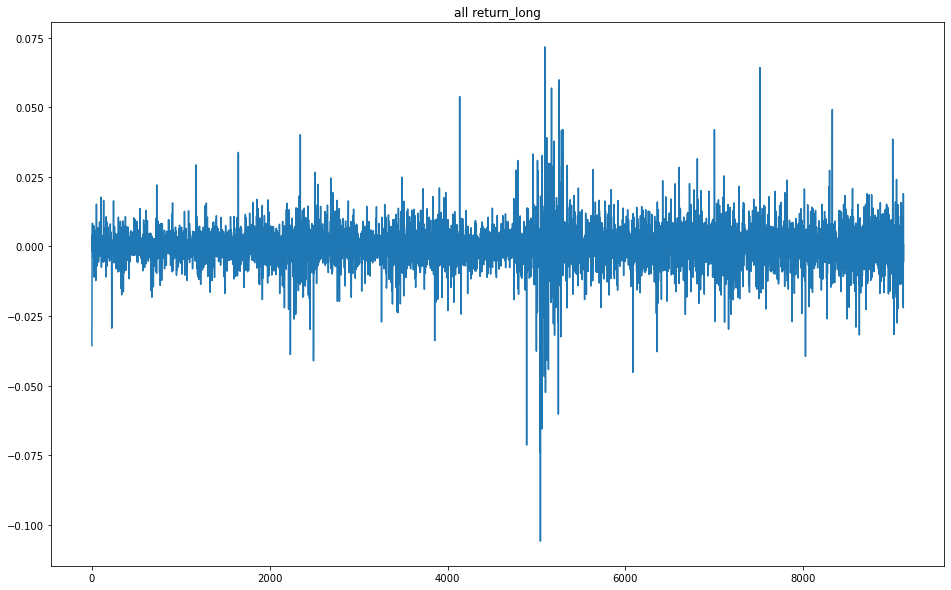

In [78]:
plt.figure(1, figsize=(16, 10))
plt.title("all return_long")
plt.plot(ret_long);

In [79]:
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1,(1/3))), regression='ct', autolag=None)
result

# (-20.703232591517647,
#  0.0,
#  20,
#  9108,
#  {'1%': -3.9597643151986506,
#   '5%': -3.4109721467547023,
#   '10%': -3.1273339296453244})

## it's still stationary

(-20.703232591517647,
 0.0,
 20,
 9108,
 {'1%': -3.9597643151986506,
  '5%': -3.4109721467547023,
  '10%': -3.1273339296453244})

In [82]:
result = ts.kpss(ret_long, regression='c', nlags=int(3*math.sqrt(len(ret_long))/13))
result

# (0.045437142290043114,
#  0.1,
#  22,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))

# ## p-value is 0.1 so it's stationary

(0.045437142290043114,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, it's still stationary for 4096 ticks


- check simple strategy


- set triger threshold

In [83]:
threshold = 0.001
len(ret_long)
# 9129

9129


- make up the return series to match uo with original data

- plot price series

- number of ticks above the threshold, to be long position

In [84]:
sum(np.array(ret_long)>threshold)
## 3710

3710

- number of ticks below negetive threshold, to be short position

In [85]:
sum(np.array(ret_long)< -threshold)
## 3615

3615

- set position


- number of ticks

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [86]:
## backtest method: signal value decides position
from collections import OrderedDict
def get_daily_pnl_fast(date, product="rb", period=4096, tranct_ratio=False, threshold=0.001, tranct=0.21, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    ori_data = cPickle.loads(raw_data) ## original data
    data=ori_data[ori_data["good"]] ## the middle day of original data
    n_bar = len(data)  ## number of bars
    unit = np.std(data["ret"]) ## standard deviation of return
    np.random.seed(10)
    ##  we repeat the above code to get daily result
    ret_long = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True) ## future return, used as signal
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long>threshold) & (np.array(data["next.ask"])>0)] = 1 ## signal>thre, position =1
    signal[(ret_long< -threshold) & (np.array(data["next.bid"])>0)] = -1 ## signal< -thre, position = -1
    position=signal
    position[0]=0
    position[n_bar-1] = 0 ## close position before the end of day
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = np.array(change_pos>0)
    change_sell = np.array(change_pos<0)
    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct) ## buy price, use next ask, tranct cost use notional*ratio
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct) ## sell price use next bid
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct ## fix tranct cost per share
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we try one day as an example

In [87]:
import dask
from dask import compute, delayed

get_daily_pnl_fast(all_dates[0], product="ru", period=4096, tranct_ratio=True, threshold=0.001, tranct=1.1e-4)

# OrderedDict([('date', '20171009.pkl'),
#              ('final.pnl', -91.59086000001844),
#              ('turnover', 450826.0046200003),
#              ('num', 96),
#              ('hld.period', 27646)])

OrderedDict([('date', '20171009.pkl'),
             ('final.pnl', -91.59086000001844),
             ('turnover', 450826.0046200003),
             ('num', 96),
             ('hld.period', 27646)])

- Then we use it for all days

In [88]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="ru", period=4096, tranct_ratio=True, threshold=0.001, tranct=1.1e-4, noise=0)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 42.4 s

Wall time: 42.4 s


- Now we can use a function to check its performance

In [89]:
from collections import OrderedDict
def get_performance(result, spread=1):
    aa = pd.DataFrame(result)
    aa.set_index("date", inplace=True)
    col_names = aa.columns
    row_names = aa.index
    stat = aa.values
    stat = np.array(np.rec.fromrecords(aa.values))
    np_names = aa.dtypes.index.tolist()
    stat.dtype.names = tuple([name for name in np_names])
    stat = pd.DataFrame(stat)
    pnl = stat["final.pnl"].cumsum()
    date_str = [n[0:8] for n in row_names]
    date_format = [pd.to_datetime(d) for d in date_str]
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(date_format, pnl)
    n_days = len(stat)
    num = stat["num"].mean()
    if num==0:
        return;
    if (stat["final.pnl"].std()==0):
        sharpe = 0
    else:
        sharpe = stat["final.pnl"].mean()/stat["final.pnl"].std()*math.sqrt(250)
    drawdown = max(pnl.cummax()-pnl)/pnl.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(stat["final.pnl"]>0)/n_days
   
    avg_pnl = sum(stat["final.pnl"])/sum(stat["num"])/spread
    hld_period = sum(stat["hld.period"])/sum(stat["num"])
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-1.573017,-1.041807,-0.95987,0.206379,91.104128,-2.008094,270.726907


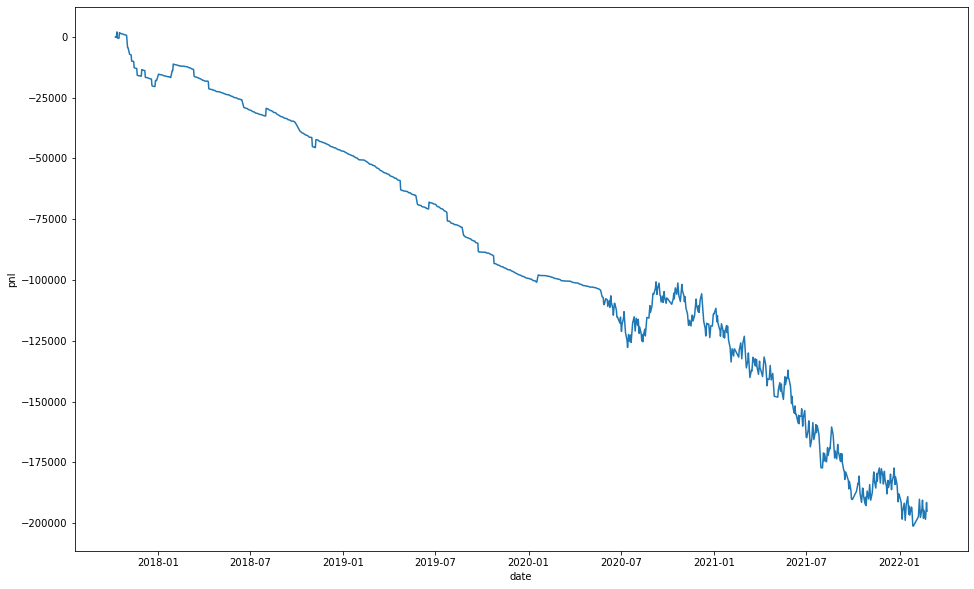

In [90]:
pd.DataFrame(get_performance(result, 1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-1.573017 	-1.041807 	-0.95987 	0.206379 	91.104128 	-2.008094 	270.726907



- we can see it's really bad
- we can try increasing threshold

In [91]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="ru", period=4096, tranct_ratio=True, threshold=0.01, tranct=1.1e-4, noise=0)
    result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]

Wall time: 41.8 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-0.070633,-5.84697,-0.171029,0.157598,13.758912,-0.302454,154.373219


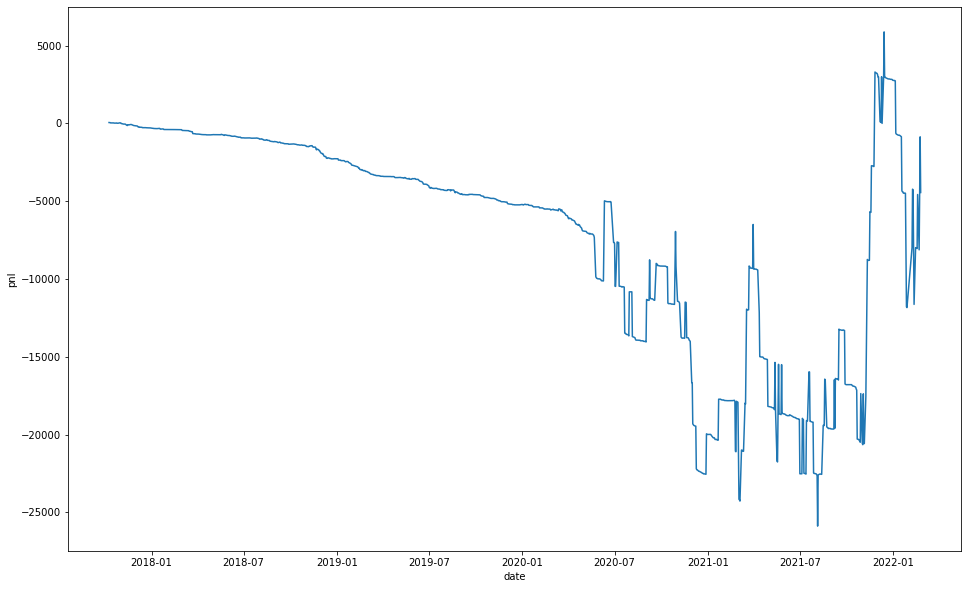

In [92]:
pd.DataFrame(get_performance(result_2), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	-0.070633 	-5.84697 	-0.171029 	0.157598 	13.758912 	-0.302454 	154.373219

In [93]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product="ru", period=4096, tranct_ratio=True, threshold=0.02, tranct=1.1e-4, noise=0)
    result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 39.4 s


Wall time: 39.4 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,0.890166,0.29709,3.365985,0.047842,2.073171,9.972816,119.866968


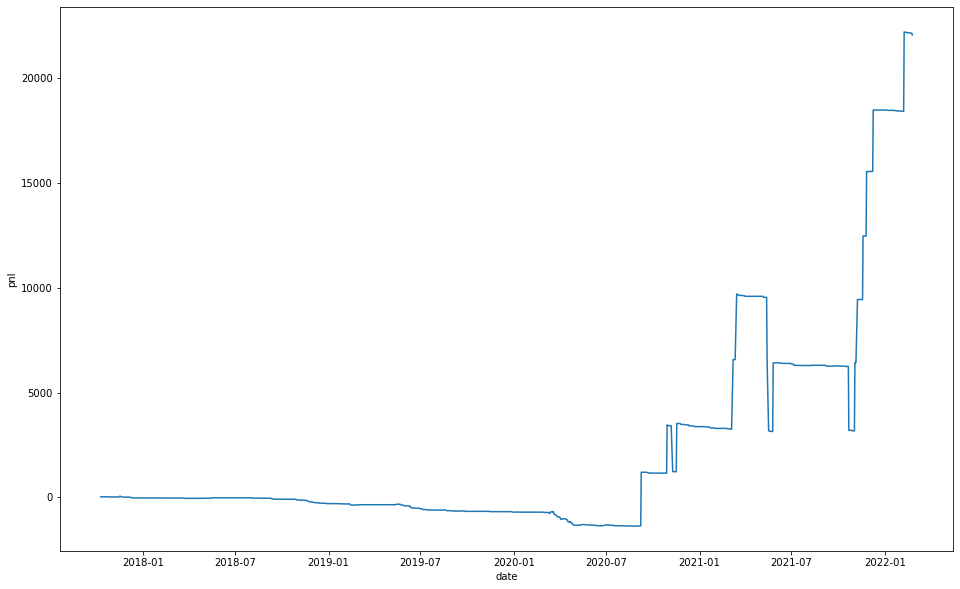

In [95]:
pd.DataFrame(get_performance(result_3, 1), index=[0])

# 	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	0.890166 	0.29709 	3.365985 	0.047842 	2.073171 	9.972816 	119.866968

- Although it's profitable there are very few trades.
- Now we use a different scheme.
- In previous scheme, we close our position when the value is not strong enough.
- It may close the positions too soon that it cannot cover transaction cost on average
- So we change our backtest method to make it holding positions longer

In [96]:
## backtest use good method
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, tranct_ratio=False, threshold=0.001, tranct=1.1e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    data = data[data["good"]].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1 #
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1## if signal==1, position_pos=1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0  ## if ret< -threshold, position_pos=0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1 ## if signal==-1, position_neg=-1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0 ## if ret> threshold, position_neg=0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg ## total position
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [97]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="ru", period=4096, tranct_ratio=True, threshold=0.001, tranct=1.1e-4, noise=0)
    result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 47.6 s

Wall time: 47.6 s


- the col names and row names are opposite

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,27.186233,0.000038,25992.122152,0.993433,14.136961,5.687187,2506.389847


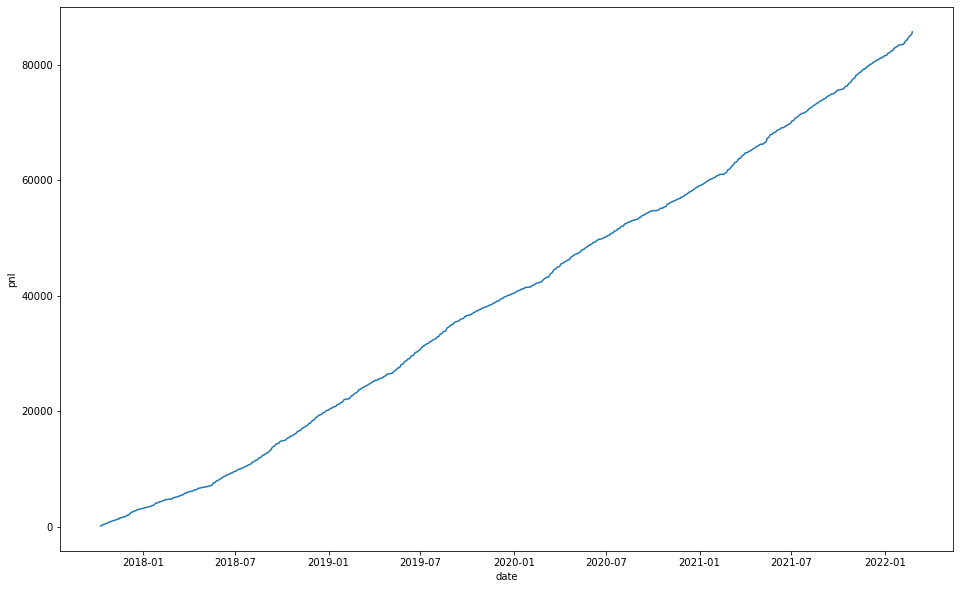

In [99]:
pd.DataFrame(get_performance(result_4,1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	27.186233 	0.000038 	25992.122152 	0.993433 	14.136961 	5.687187 	2506.389847

- we can see it's much better than before.
- Keep in mind that it uses future data here so the result is not realistic
- we just want to show that this scheme is much better than the previous one
- and we would use this backtest method in the future course

In [100]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="ru", period=4096, tranct_ratio=True, threshold=0.002, tranct=1.1e-4, noise=5)
    result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 48.6 s

Wall time: 48.6 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,0.315362,4.226205,0.236619,0.950281,40.370544,0.285062,877.135332


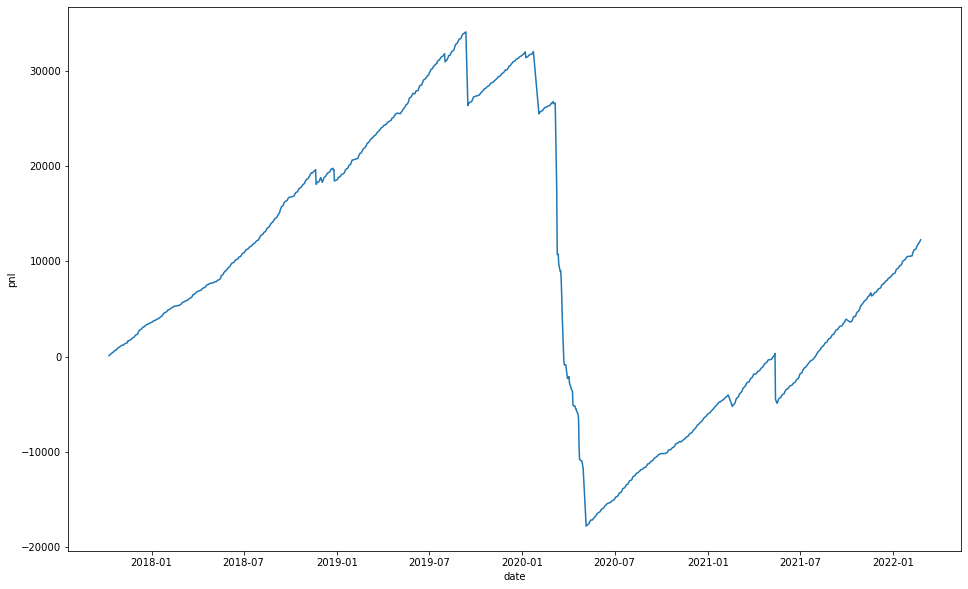

In [101]:
pd.DataFrame(get_performance(result_5,1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	0.315362 	4.226205 	0.236619 	0.950281 	40.370544 	0.285062 	877.135332

- Previous method use fix size to trade, 
- now we suppose fix notional value of each trade

In [102]:
## daily pnl of fixed capital
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, tranct_ratio=False,threshold=0.001, tranct=1.1e-4, noise=0, notional=False):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    data = data[data["good"]].reset_index(drop=True)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    pre_pos = position_pos.shift(1)
    position_pos[(position_pos==1) & (pre_pos==1)] = np.nan ## holding positio rather than trade, change to nan
    position_pos[(position_pos==1)] = 1/data["next.ask"][(position_pos==1)] ## use 1/price as trading volume
    position_pos.ffill(inplace=True) 
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    pre_neg = position_neg.shift(1)
    position_neg[(position_neg==-1) & (pre_neg==-1)] = np.nan  ## holding positio rather than trade, change to nan
    position_neg[(position_neg==-1)] = -1/data["next.bid"][(position_neg==-1)] ## use 1/price as trading volume
    position_neg.ffill(inplace=True) ## replace nan by trading volume
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0

    if (tranct_ratio):
        change_base[change_buy] = data["next.ask"][change_buy]*(1+tranct)
        change_base[change_sell] = data["next.bid"][change_sell]*(1-tranct)
    else:
        change_base[change_buy] = data["next.ask"][change_buy]+tranct
        change_base[change_sell] = data["next.bid"][change_sell]-tranct
    final_pnl = -sum(change_base*change_pos)
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0))
    hld_period = sum(position!=0)
  
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date), ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

In [103]:
get_daily_pnl(all_dates[0], product="ru", period=4096, tranct_ratio=True, threshold=0.001, tranct=1.1e-4, notional=True)

# OrderedDict([('date', '20171009.pkl'),
#              ('final.pnl', 0.0490426162436608),
#              ('turnover', 23.980669376951425),
#              ('num', 12),
#              ('hld.period', 37302)])

OrderedDict([('date', '20171009.pkl'),
             ('final.pnl', 0.0490426162436608),
             ('turnover', 23.980669376951425),
             ('num', 12),
             ('hld.period', 37302)])

In [104]:
 %%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product="ru", period=4096, tranct_ratio=True, 
                              threshold=0.001, tranct=1.1e-4, noise=0, notional=True)
    result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 49.2 s

Wall time: 49.2 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,26.503323,0.000038,26575.900864,0.993433,14.136961,0.001931,2506.389847


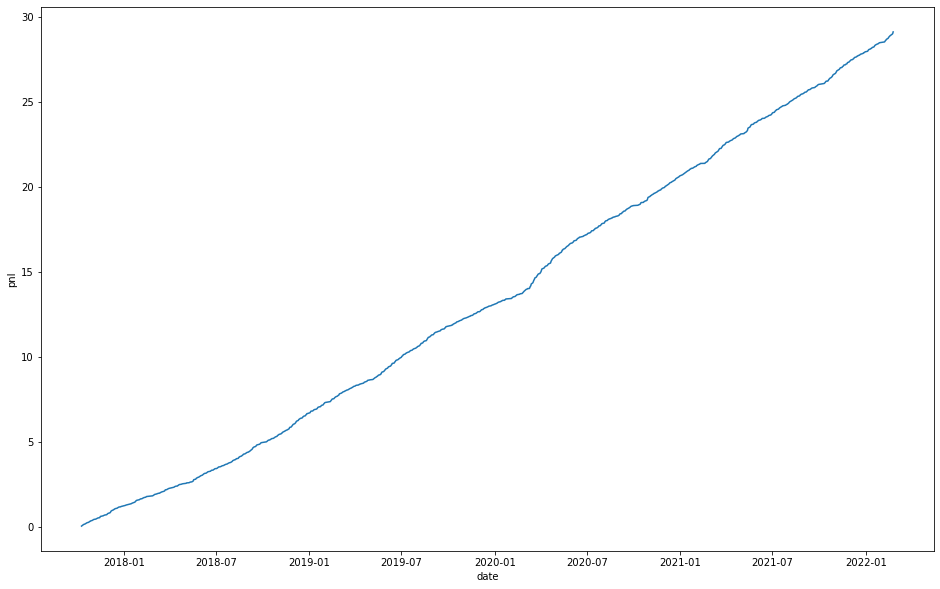

In [106]:
pd.DataFrame(get_performance(result,1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 0 	26.503323 	0.000038 	26575.900864 	0.993433 	14.136961 	0.001931 	2506.389847

- After adding some noise, the result is worse than before but still pretty good
- the later courses we would use this backtest method to test our signals and straregies without any future data
- the reuslt would be much worse than the previous ones but they are realistic
- Homework
- You can try this method on other products and comapre their results